# Ternary Classifier Predictions

Uses a previously trained network to classify images and then saves the resulting prediction averages.

In [6]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import sqlite3
import pickle
import json
import math
import random
import pandas as pd

In [7]:
image_pkl_filename = "ternary_classifier_predictions.pkl"

# READ PKL
with open(image_pkl_filename, "rb") as read_file:
    image_data = pickle.load(read_file)

In [8]:
# image_data

In [9]:
test_data = image_data[:]

In [10]:
# test_data

### Generate plot

Loop over all of the data and retrieve the category, year and predictions. Calculate the totals for each class prediction and convert to percentages for diagram, sensor and unsure. Plot each category to a subplot with bars for each year within that category. Delete additional plots, add title and legend, then save.

0 0
category -  acc-phys
[6, 0, 0]
[16, 0, 0]
[97, 0, 0]
t [6, 16, 97]
d [6, 16, 97]
s [0, 0, 0]
u [0, 0, 0]
d% [100.0, 100.0, 100.0]
s% [0.0, 0.0, 0.0]
u% [0.0, 0.0, 0.0]
1 0
category -  adap-org
[41, 0, 1]
[12, 0, 20]
[84, 0, 7]
[83, 0, 1]
[260, 0, 7]
[310, 4, 40]
[351, 4, 82]
t [42, 32, 91, 84, 267, 354, 437]
d [41, 12, 84, 83, 260, 310, 351]
s [0, 0, 0, 0, 0, 4, 4]
u [1, 20, 7, 1, 7, 40, 82]
d% [97.61904761904762, 37.5, 92.3076923076923, 98.80952380952381, 97.37827715355806, 87.57062146892656, 80.32036613272311]
s% [0.0, 0.0, 0.0, 0.0, 0.0, 1.1299435028248588, 0.9153318077803204]
u% [2.380952380952381, 62.5, 7.6923076923076925, 1.1904761904761905, 2.6217228464419478, 11.299435028248588, 18.76430205949657]
2 0
category -  alg-geom
[1, 0, 0]
[10, 0, 0]
[31, 0, 0]
[92, 0, 2]
[258, 0, 25]
t [1, 10, 31, 94, 283]
d [1, 10, 31, 92, 258]
s [0, 0, 0, 0, 0]
u [0, 0, 0, 2, 25]
d% [100.0, 100.0, 100.0, 97.87234042553192, 91.16607773851591]
s% [0.0, 0.0, 0.0, 0.0, 0.0]
u% [0.0, 0.0, 0.0, 2.1276

[436, 0, 10]
[304, 1, 8]
[336, 1, 4]
t [23, 96, 119, 89, 128, 175, 310, 79, 116, 253, 188, 314, 296, 446, 313, 341]
d [19, 74, 112, 85, 123, 172, 287, 77, 113, 247, 179, 300, 294, 436, 304, 336]
s [2, 3, 3, 2, 2, 0, 6, 0, 0, 0, 1, 2, 0, 0, 1, 1]
u [2, 19, 4, 2, 3, 3, 17, 2, 3, 6, 8, 12, 2, 10, 8, 4]
d% [82.6086956521739, 77.08333333333334, 94.11764705882352, 95.50561797752809, 96.09375, 98.28571428571429, 92.58064516129032, 97.46835443037975, 97.41379310344827, 97.62845849802372, 95.2127659574468, 95.54140127388536, 99.32432432432432, 97.75784753363229, 97.12460063897763, 98.53372434017595]
s% [8.695652173913043, 3.125, 2.5210084033613445, 2.247191011235955, 1.5625, 0.0, 1.935483870967742, 0.0, 0.0, 0.0, 0.5319148936170213, 0.6369426751592357, 0.0, 0.0, 0.3194888178913738, 0.2932551319648094]
u% [8.695652173913043, 19.791666666666664, 3.361344537815126, 2.247191011235955, 2.34375, 1.7142857142857144, 5.483870967741936, 2.5316455696202533, 2.586206896551724, 2.371541501976284, 4.2553191

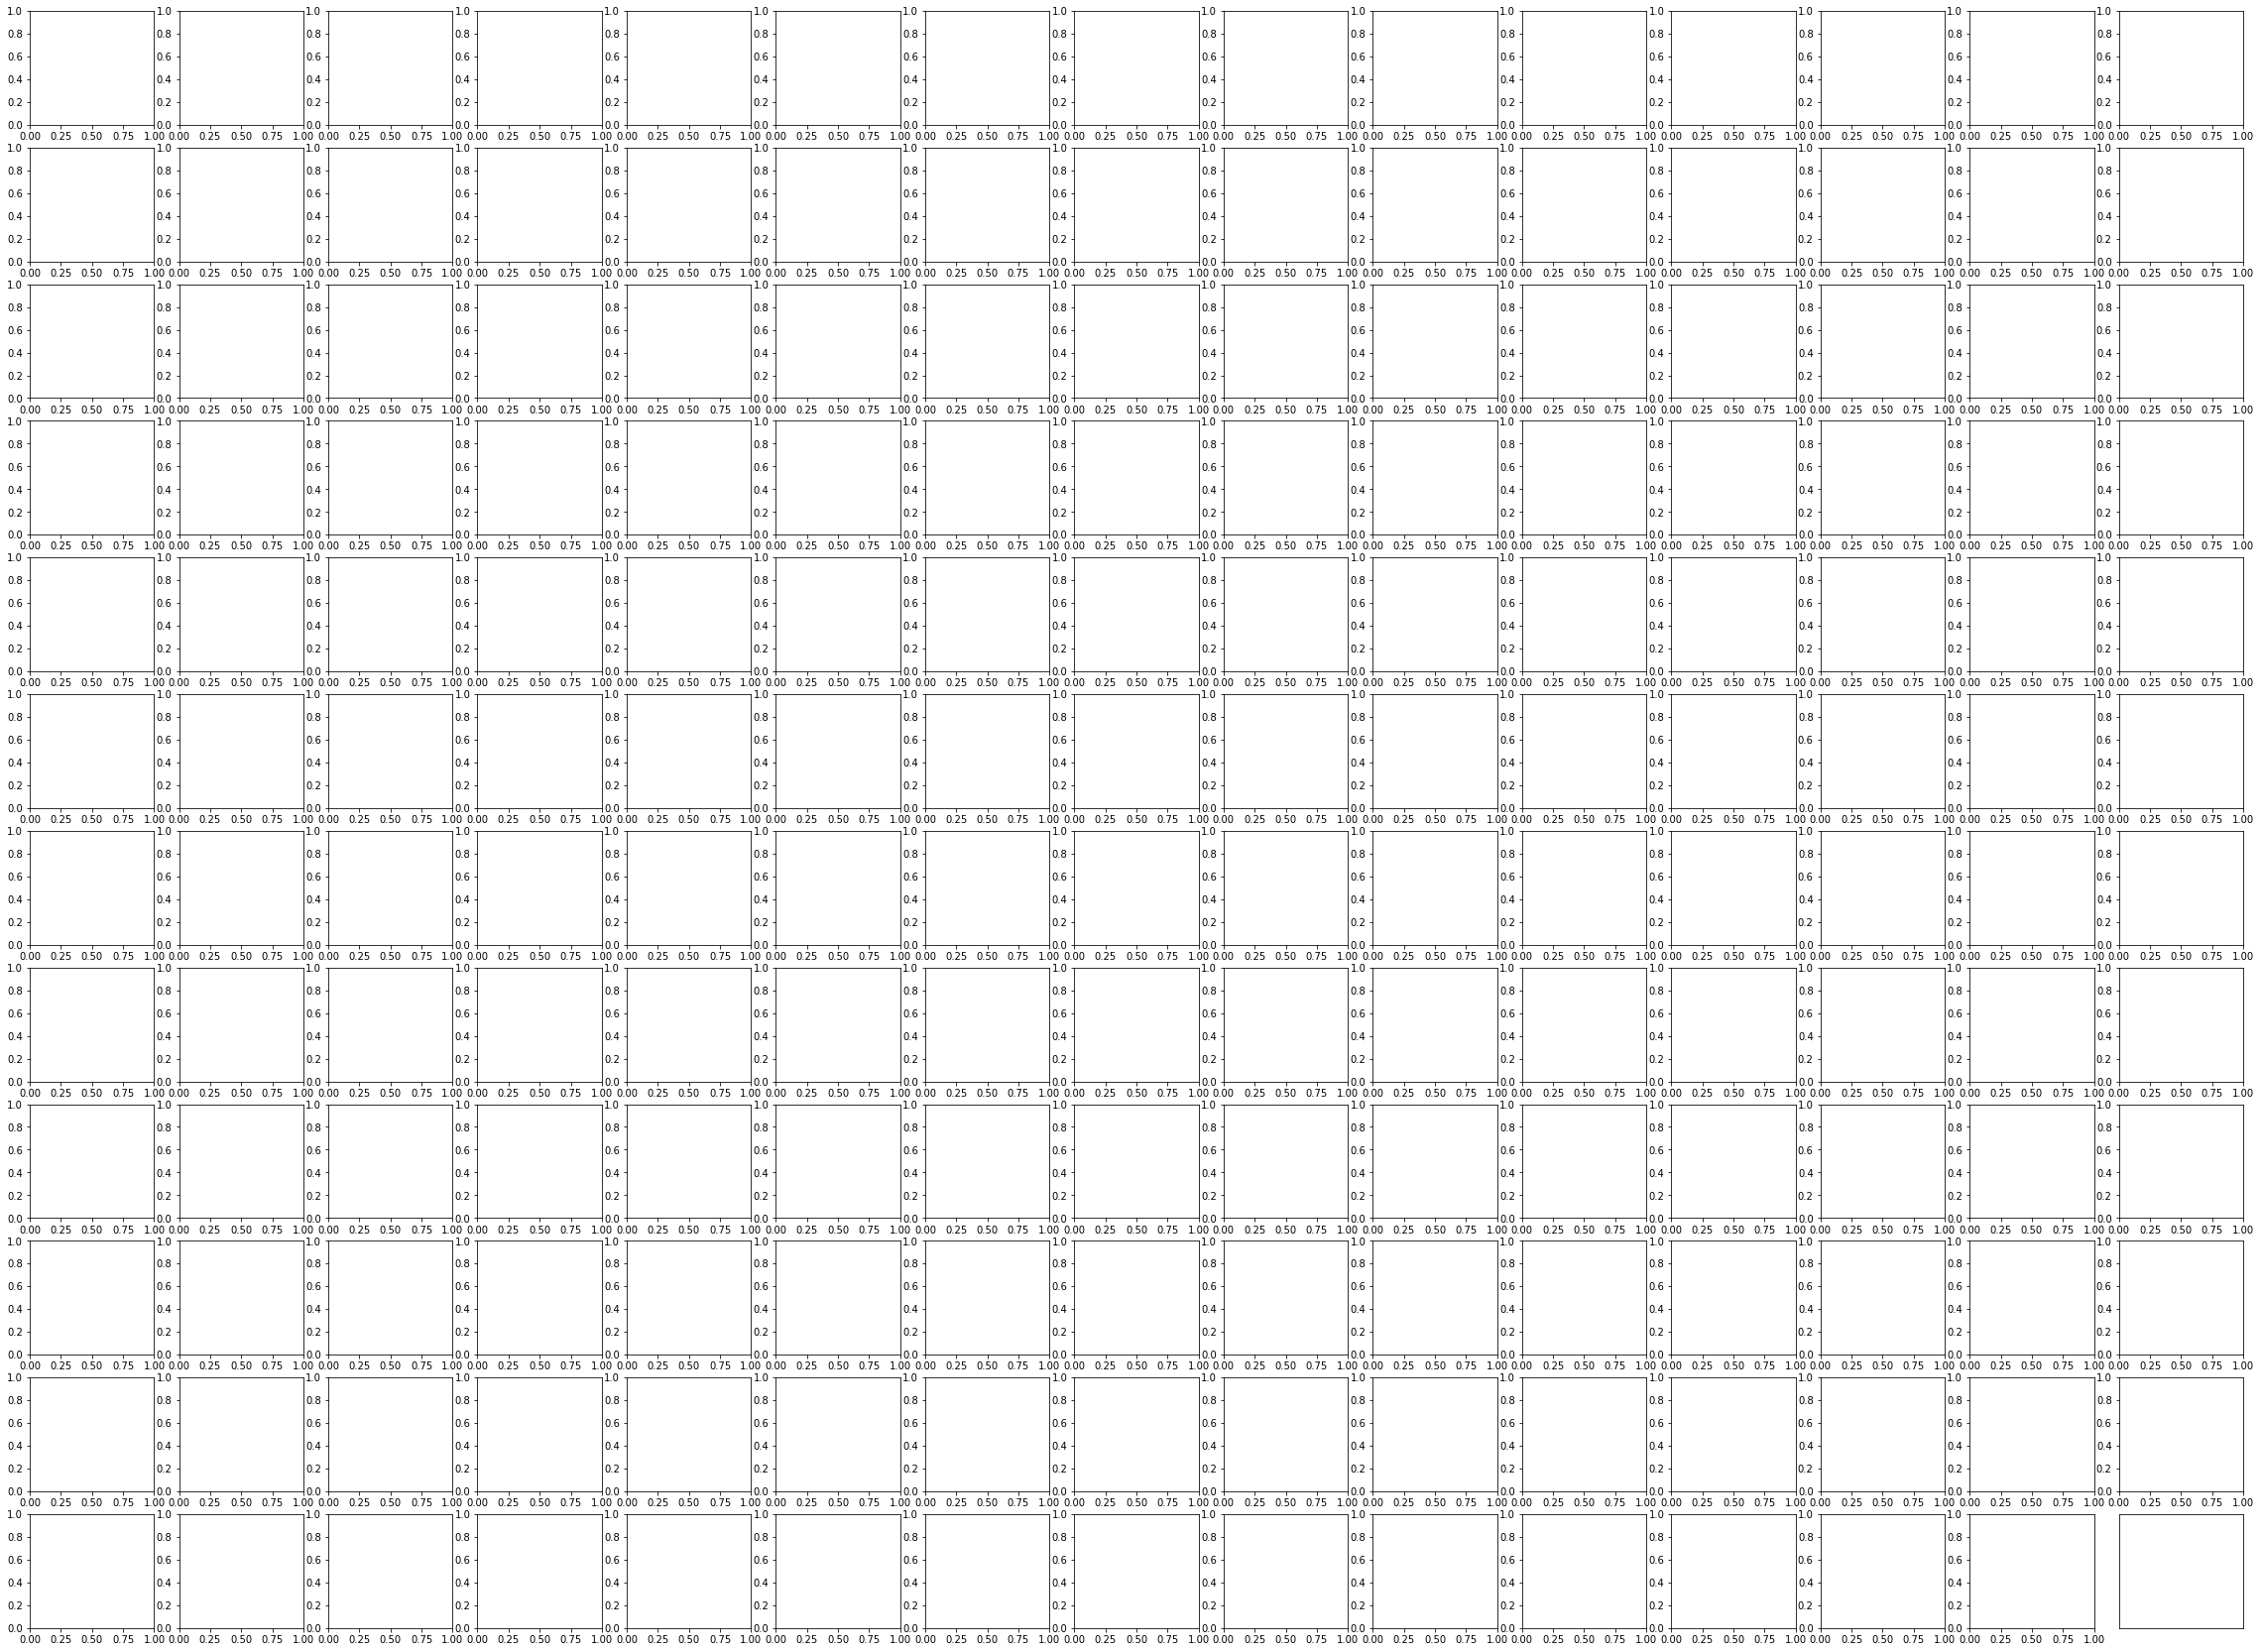

In [12]:
xdim = 15
ydim = 12

fig, ax = plt.subplots(ydim, xdim)
fig.subplots_adjust(hspace=0.2, wspace=0.2)
fig.set_size_inches(40, 30)

plt.yticks([])
plt.xticks([])

dt = 0
st = 0
ut = 0

for i, cat in enumerate(test_data[:]):
    
    y = math.floor(i / xdim)
    x = i - (y * xdim)
    print(x, y)
    
    print("category - ",cat[0])
    
    diagrams = []
    sensors = []
    unsures = []
    sum_totals = []
    
#     a = np.array([])
    
    for class_totals in cat[3]:
        print(class_totals)
#         np.append(a, class_totals)
        year_total = 0
        for res in class_totals:
            year_total += res
        sum_totals.append(year_total)
        
        diagrams.append(class_totals[0])
        sensors.append(class_totals[1])
        unsures.append(class_totals[2])
        
        dt += class_totals[0]
        st += class_totals[1]
        ut += class_totals[2]
                
    print("t",sum_totals)
    print("d",diagrams)
    print("s",sensors)
    print("u",unsures)
    
    diagram_percentages = [i / j * 100 for i, j in zip(diagrams, sum_totals)]
    sensor_percentages = [i / j * 100 for i, j in zip(sensors, sum_totals)]
    unsure_percentages = [i / j * 100 for i, j in zip(unsures, sum_totals)]
    
    print("d%",diagram_percentages)
    print("s%",sensor_percentages)
    print("u%",unsure_percentages)
    
#     print(a)

#     barWidth = 5 / len(diagram_percentages)
#     print("barWidth:",barWidth)

'''
    
    indexes = [i for i,_ in enumerate(diagrams)]
    print("indexes:",indexes)
    
#     ax[i, j].plot(data[idx][1], data[idx][2], '--r.')
#     ax[i, j].title.set_text(data[idx][0])
            
    ax[y,x].bar(indexes, diagram_percentages, color='#26bfb8', edgecolor='white')
    ax[y,x].bar(indexes, sensor_percentages, bottom=diagram_percentages, color='#e6d929', edgecolor='white')
    ax[y,x].bar(indexes, unsure_percentages, bottom=[i+j for i,j in zip(diagram_percentages, sensor_percentages)], color='#e62929', edgecolor='white')

    ax[y,x].set_xticklabels([])
    ax[y,x].set_yticklabels([])
    
    ax[y,x].title.set_text(cat[0])

    print("*" * 20)

fig.suptitle("Ternary classifier predictions on arXiv primary categories", x=0.5, y=0.92, size=28)

for i in range(len(test_data), xdim * ydim):
    print("i:",i)
    y = math.floor(i / xdim)
    x = i - (y * xdim)
    print(x, y)
    
    fig.delaxes(ax[y][x])

colors = {'unsure':'#e62929', 'sensor':'#e6d929', 'diagram':'#26bfb8'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
# ax[11, 14].legend(handles, labels, loc="lower right")
fig.legend(handles, labels, loc=(0.908,0.08))
    
fig.savefig("plot_ternary_classifier_predictions.svg", dpi=300, bbox_inches='tight', pad_inches=0.5)
'''

print("dt:",dt)
print("st:",st)
print("ut:",ut)

In [15]:
tt = dt + st + ut
dper = dt/tt
sper = st/tt
uper = ut/tt
print(tt)
print(dper)
print(sper)
print(uper)

1627942
0.9188834737355508
0.02109657469369302
0.06001995157075621
